本章的目的 是给 小游戏 添加一个 力场 .

- 用数学函数 建模的力场 ， 称为向量场 ;
- 向量场经常作为 微积分运算的结果 ， 称为 梯度 ;

## 1. 用向量场对引力建模


在 Python 中， 二维的向量场是一个函数

- 它接收1个用来表示 点的二维向量
- 返回一个表示该点受力的 二维向量

引力场 告诉我们在 这任意一点上:

- 引力有多强
- 是什么方向

代表势能的 **标量场** 和代表引力的 **向量场** 是不同的数学模型. 但是 物理意义相同 .

- 离黑洞越远, 势能越大 .

我们在数学上用 一种 通过 **梯度的运算** 把二者结合起来 .


## 2. 引力场建模

### 2.1 定义一个向量场

向量场为空间的每个点 分配了一个 向量 .


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)



In [26]:
def f(x, y):
    return -2 * y, x

In [27]:
def plot_vector_field(f, xmin, xmax, ymin, ymax, xstep=1, ystep=1):
    """
    @param plot_vector_field : 向量场函数
    @param xmin ... 向量场的边界
    """
    X, Y = np.meshgrid(np.arange(xmin, xmax, xstep), np.arange(ymin, ymax, ystep))
    U = np.vectorize(lambda x, y: f(x, y)[0])(X, Y)
    V = np.vectorize(lambda x, y: f(x, y)[1])(X, Y)
    plt.quiver(X, Y, U, V, color='red')
    fig = plt.gcf()
    fig.set_size_inches(7, 7)

我们介绍一下 向量场的基本符号

任意位置 (x, y) .

向量场函数用 $$\F(x,y)$$ .
这个函数的返回值也是一个向量 .

例如
$$
F(x, y) = (-2y , x)
$$

通常会把 输入向量点和 输出向量点 用箭头连起来 .

箭头多了就容易重叠, 图也会变得难以辨认, 为了避免这种情况 , 通常会把 向量的长度用固定的系数 按照比例来缩小 .

通常会把 向量的长度用固定的系数按照比例缩小.

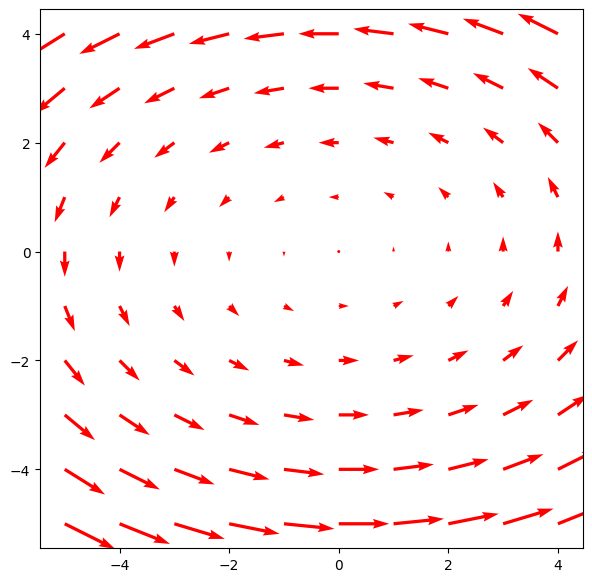

In [28]:
plot_vector_field(f, -5, 5, -5, 5)

### 2.2.2 定义一个简单的力场

- 离 引力源 越近 引力越强
- F(x, y) = (-x , -y)

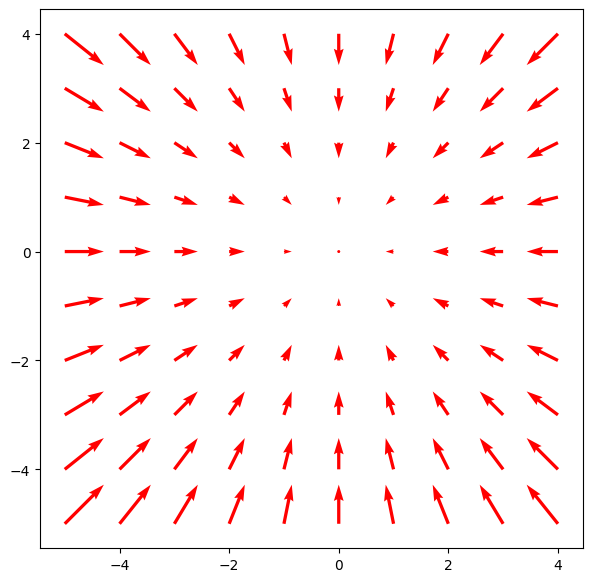

In [29]:
plot_vector_field(
    lambda x, y: (-x, -y),
    -5, 5, -5, 5
)

这个立场, 很诡异, 你越远,  力场就越强. 逃逸不了.

### 2.2.3 把引力加入小游戏


```python
def gravitational_field(sources, x, y):
    fields = [vectors.scale(- source.gravity, (x - source.x, y - source.y))
              for source in sources]
    return vectors.add(*fields)

def move():
    # 由于按键形成的推力
    ax, ay = thrust_vector

    # 由于引力形成的引力
    gx, gy = gravitational_field(gravity_sources, self.x, self.y)
    ax += gx
    ay += gy
    self.vx += ax * milliseconds / 1000
    self.vy += ay * milliseconds / 1000
```

代码位于 d4/asteroids.py  中, 可以直接运行

### 2.2.4 exercises

**exec1**: (-2 -x , 4 - y) 这个向量场指向哪里 ?

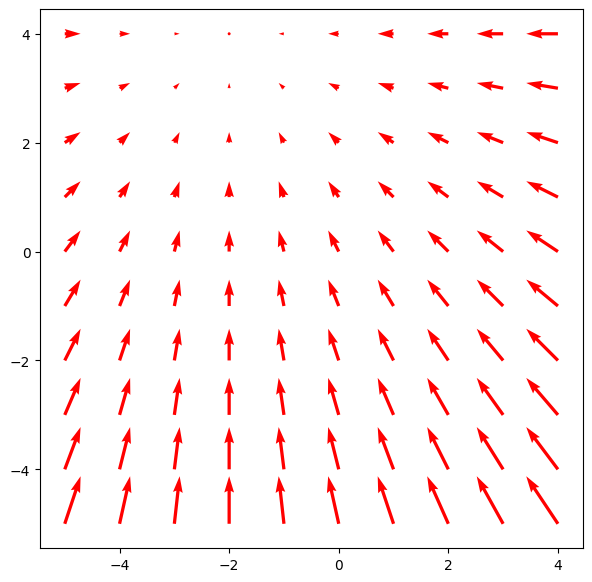

In [30]:
plot_vector_field(
    lambda x, y: (-2 - x, 4 - y),
    -5, 5,
    -5, 5
)

从图像上看是 -2, 4 .

因为 -x, -y 是指向 (0, 0) 的 . 简单推导下

假设中心是 (a, b)

场则是 (a-x, b-y)

**exec2:** 假设有2个黑洞, 引力都是 0.1 , 分别在 (-3, 4) 和 (2 ,1)

最终的效果则是, 对于任何的位置 (x, y)

$$
g(x,y) = 0.1(-3 -x, 4-y) + 0.1 (2-x, 1-y) = 0.2 (-0.5 -x , 2.5 - y)
$$

**exec3**: 在小游戏中 增加2个黑洞 .

在每次循环中调用 每个循环黑洞的 move 方法, 将所有的黑洞组成1个列表, 作为引力源传入 .

## 3. 引入势能

基本的思路如下: 之前把引力想象为 每个点上的力向量, 总是把对象拉向 1个源头 .

另一种想法是: 引力场的对象就像碗里的 弹珠一样 . 弹珠总是滚开后 被拉回 .

- 势能函数定义了这个碗的形状


我们可以把 势能函数这样写:

- 接收 (x, y) 返回一个标量值
- 这个值代表了 (x, y) 的重力势能

### 3.1 定义势能标量场

例如:

$$
U(x, y) = 1/2 (x^2 + y^2)
$$

非常有趣的是 上面的势能函数 刚好对应向量场.

$$
F(x, y) = (-x , -y)
$$

数学运算上可以证明 这点， 不急  先看图  .

In [31]:
def u(x, y):
    return 0.5 * (x ** 2 + y ** 2)


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


def plot_scalar_field(f, xmin, xmax, ymin, ymax, xstep=0.25, ystep=0.25, c=None, cmap=cm.coolwarm, alpha=1,
                      antialiased=False):
    # fig = plt.figure()
    # fig.set_size_inches(7, 7)
    # ax = fig.gca(projection='3d')
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    fig.set_size_inches(7, 7)
    fv = np.vectorize(f)

    # Make data.
    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, color=c, alpha=alpha,
                           linewidth=0, antialiased=antialiased)

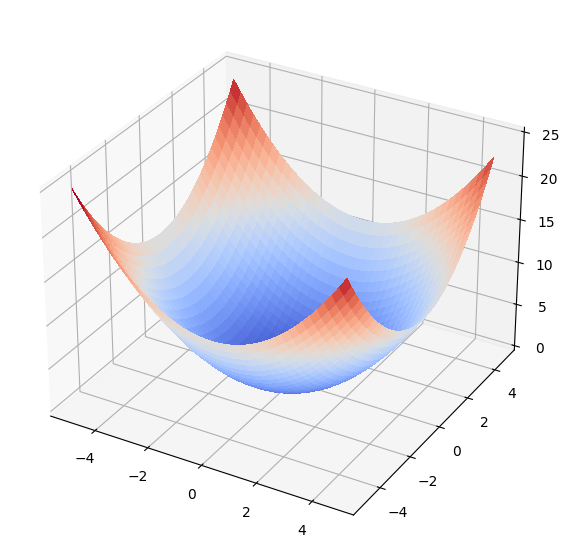

In [32]:
plot_scalar_field(u, -5, 5, -5, 5)

这确实很像1个碗, 我们确实描绘出了.

其中 Z 轴的值代表了 势能值.
离原点 (0,0) = 0 越远 , 势能都越大 .

### 3.2 把标量场绘制为 热图

使用颜色方案 而不是 z 坐标来代表 大小.

<Figure size 700x700 with 0 Axes>

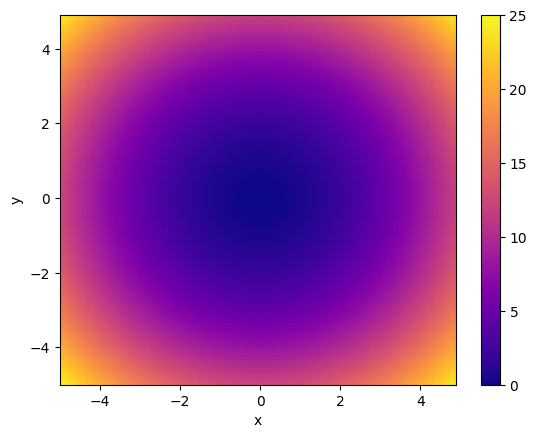

In [33]:
def scalar_field_heatmap(f, xmin, xmax, ymin, ymax, xstep=0.1, ystep=0.1):
    fig = plt.figure()
    fig.set_size_inches(7, 7)

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)

    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X, Y)

    #     # x and y are bounds, so z should be the value *inside* those bounds.
    #     # Therefore, remove the last value from the z array.
    #     z = z[:-1, :-1]
    #     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X, Y, z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    plt.xlabel('x')
    plt.ylabel('y')


scalar_field_heatmap(u, -5, 5, -5, 5)

- 在中心位置, 颜色越深 代表势能越小 ;
- 离中心越远， 颜色越浅 代表势能越大 ;

### 3.3 等高线图

和 热图类似的 是等高线图 . 以前可能你见过等高线图 .

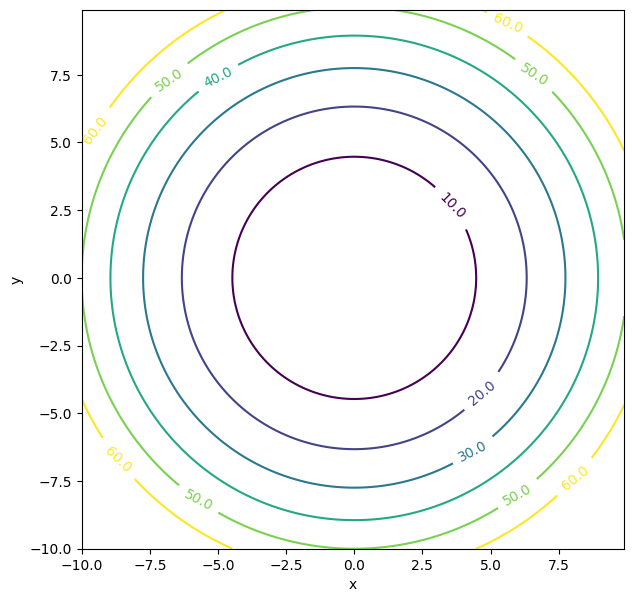

In [34]:
def scalar_field_contour(f, xmin, xmax, ymin, ymax, levels=None):
    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, 0.1)
    Y = np.arange(ymin, ymax, 0.1)
    X, Y = np.meshgrid(X, Y)

    # https://stackoverflow.com/a/54088910/1704140
    Z = fv(X, Y)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, levels=levels)
    ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
    plt.xlabel('x')
    plt.ylabel('y')
    fig.set_size_inches(7, 7)


scalar_field_contour(u, -10, 10, -10, 10, levels=[10, 20, 30, 40, 50, 60])

可以看到 :

- 这些曲线都是 圆形的 ;
- 而且 随着曲线的 延伸 距离越来越近 ;
- 这意味着 和原点越远, 这些地方越陡峭 ;
- 从 30 增加到 40 的距离逼 从 10 到 20 的距离要短

## 4. 用梯度连接能量和力

**陡度** 的概念很重要, 他说明了一个对象继续往那个方向上运动需要多少的能量.

确实, 往某个方向上运动需要的 能量可以 用于衡量 在方向相反上 需要的力 ;

**梯度是种运算， 接收势能一样的 标量场. 生成引力一样的引力场.**

在平面上的每1个位置 (x, y) , 梯度向量场 都指向 标量场 **增大最快的方向** .

- 确实 回想一下 重力的向量场, 下降的方向是最快的 .

### 4.1 用横截面测量陡度

还有一种对函数 U(x, y) 进行可视化的方法, 能够很容易观察到不同点上的 陡峭程度. 以 (x, y) = (-5, 2) 作为 例子 .

- U(-5, 2) = 14.5 位于 U = 10 和 U = 20  2条曲线之间 .
- 如果往 x 轴正方向移动, 就会碰见 U = 10 也就是说在  x 轴正方向上 减小
- 如果往 y 轴正方向移动, 就会碰见 U = 20 , 也就是说 y 轴正方向上 增加


假设在点 (-5, 2) 我们可以把 x = -5 固定住.
- x= -5 是一个三维空间的平面
- U(x, y) 是一个曲面 .

二者的相交的平面 就是 x= - 5 的横截面 . 此时会一个曲线.

- 横座标是 y
- 值是 U(-5, y)

只有1个参数 我们很容易进行求导, 分析这个曲线 .

同样的思路去分析 y .

这2个斜率很重要, 代表某个方向的 陡度, 这些值称为 U 的 **偏导数** .

### 4.2 计算偏导数

`U(-5, y)` 和 `U(x, 2)` 都是只有一个变量的函数 . 因此可以通过计算短割线的斜率来近似它们的导数 .

转为单变量的思路 .

### 4.3 梯度

梯度的几何意义 .

例如之前的

$$F(x, y) =  (-x, -y)$$

$$
\frac {\vartheta U} {{\vartheta x}} = x
$$

$$
\frac {\vartheta U} {{\vartheta y}} = y
$$

他的几何意义就是 在 (x.y) 截面上的 斜率 .

尽管没有证明， 在 (-5, 2) 附近有一个平面最接近 U (x, y) .  这就是那个截面 .

- 和截面 xy 平面平行的直线 不会修改 势能. 例如(-5 ,2) 他的方向是 (2, 5) .
- 而左改 90度走 就是最累的， 而这就是 梯度的方向 .

$$
\bigtriangledown{U(x,y}) = (\frac {\vartheta U} {{\vartheta x}}, \frac {\vartheta U} {{\vartheta y}})
$$


有趣的是, 这是个 同维度的 向量场。 更有趣的是. 这个向量场还和之前的 一样 !


$$
-\bigtriangledown{U(x,y}) = F(x,y)
$$


梯度是一个向量场, 他告诉了们 在任意一点处最陡的方向. 就像直线上的.

我们做1个新的例子

$$V(x,y) =  1 + y^2 - 2x^2 + x^6$$

$$
F(x,y) = (4x- 6x^5,  -2y)
$$


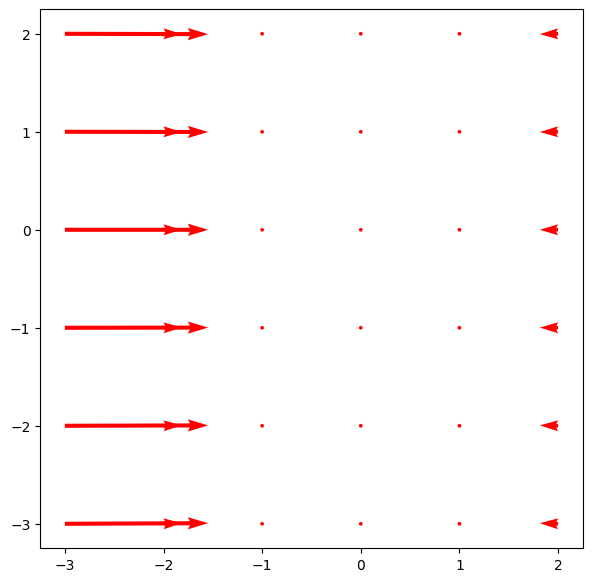

In [35]:
plot_vector_field(lambda x, y: (4 * x - 6 * math.pow(x, 5), -2 * y),
                  -3, 3, -3, 3)

## 4.4 **exercises**


**exec1:** 绘制 $$h(x,y) = e^ysin(x)$$ 的横截面.

- 1个 , y = 1
- 1个, x = pi/ 6

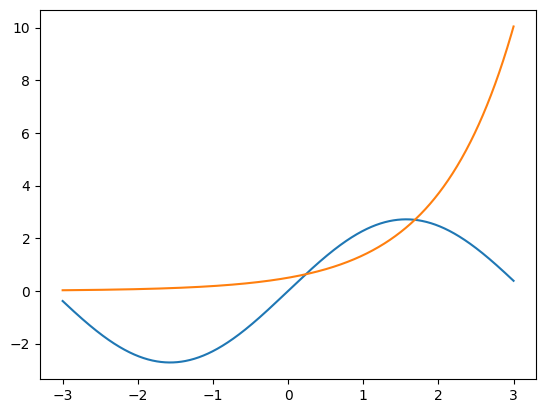

In [36]:
def plot_function(f, tmin, tmax, tlabel=None, xlabel=None, axes=False, **kwargs):
    ts = np.linspace(tmin, tmax, 1000)
    if tlabel:
        plt.xlabel(tlabel, fontsize=18)
    if xlabel:
        plt.ylabel(xlabel, fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax - tmin
        plt.plot([tmin - total_t / 10, tmax + total_t / 10], [0, 0], c='k', linewidth=1)
        plt.xlim(tmin - total_t / 10, tmax + total_t / 10)
        xmin, xmax = plt.ylim()
        plt.plot([0, 0], [xmin, xmax], c='k', linewidth=1)
        plt.ylim(xmin, xmax)


def p(x):
    return x ** 5


plot_function(lambda x: math.e * math.sin(x), -3, 3)

plot_function(lambda y: math.pow(math.e, y) / 2, -3, 3)

**exec2**:

$$z = p(x, y)$$ 在 (-5, 2) 处最接近 $$U(x, y)$$ 的平面的工程 .


平面 p(x, y) 有一些特性 . 在偏导数 恰好是 梯度 .

p(x, y) = ax + by + c 通过简单的代数计算得到:

$$
p(x, y) = -5x + 2y - 14.5
$$

现在寻找穿过 (-5, 2) 的直线 . 意味着平行于 xy 平面 .

p(x, y) =  p(-5, 2)

因此:

$$
-5x + 2y = 29
$$


## 总结


- 向量场是一个 将向量 同时作为 输入和输出的 函数 ;
- 引力可以用向量场来模拟, 空间中任意一点处向量场的值描述了 对象被引力拉动的 强度 和方向;
- 要模拟对象在向量场中的运动, 需要用他的位置信息来计算其所在力场的强度和方向 . 再用 牛顿第二定律来表明其加速度 ;
- 势能是存储起来, 可以产生运动的能量, 对象在力场中的势能 由对象所在的位置决定 ;
- 势能可以被建模为 1个标量场: 给空间中的每个点分配 1个数值, 也就是对象在这个点的 势能的量 ;
- 有几种方法 可以在 二维中描述 标量场 : 三维曲面 热图 等高线图 或者一对横截面图 ;
- 标量场的 偏导数给出了 标量场值 相对坐标的 变化率
- 偏导数 和标量场 横截面的导数相同 , 通过视为 常数， 可以计算一个变量的 偏导数
- 标量场 U 的梯度 是一个向量， 其分量是 U 相对每个坐标的 偏导数， 梯度是指向 U 最陡的上升方向或者 U 增长最快的方向 ;
- 与 力场对应的 势能函数 的负梯度 告诉我们该点处 的力场向量值， 这意味着对象 去了 比较低势能的区域